In [1098]:
#importing necessary and unnecessary modules all at once
from zipfile import ZipFile 
import csv 
import os
import glob
from sqlalchemy import create_engine
import pandas as pd
import ntpath
import re
from datatest import validate

In [1099]:
#The function below will return a dictionary containing a dataframe for each .csv file in the folder within your defined path.
#def panda_read_csv(path):
 #   pd_csv_dict = {}
  #  csv_files = glob.glob(os.path.join(path, "*.csv"))
   # for csv_file in csv_files:
    #    file_name = ntpath.basename(csv_file)
     #   pd_csv_dict['pd_' + file_name] = pd.read_csv(csv_file, sep=";", encoding='mac_roman')
    #locals().update(pd_csv_dict)
    #return pd_csv_dict

In [1100]:
#panda_read_csv('C:/Users/kumar/OneDrive/Desktop/Marketing/LichtBlick/src_data')

Importing Flat files without a function, as I don't know if importing them in bulk is necessary yet. Importing them individually helps me analyze each one of them specifically and helps forumalize ideas that would be required in cleaning. Think of it as going to the doctor, the doctor gives you prescription based on your symptoms that he analysed from your body metrics, rather than giving you a direct prescription without an analysis, well a good doctor* 

In [1101]:
path = 'C:/Users/kumar/OneDrive/Desktop/Marketing/LichtBlick/src_data'
all_files = glob.glob(os.path.join(path, "*.csv"))
list1 = []
import re
all_files.sort(key = lambda f:int(re.sub('\D', '', f)))

for f in all_files:
    x_src = pd.read_csv(f)
    list1.append(x_src)
#Print the name of the last file in the folder
print(f) 

C:/Users/kumar/OneDrive/Desktop/Marketing/LichtBlick/src_data\20210101220104_contracts.csv


In [1102]:
len(list1)

12

Hardcoding each file as a dataframe from the list, as I don't have a preferred naming convention thought after yet, to clean and load as in a table, 12 is not a big number either, but 144 is. Ideally should be done by a function, that reads each file and takes the last word {} + 'month_name', but then the folder should be sorted in the exact pattern for each month (for e.g., [Products, Prices, Contracts], which will depend on the time at which these files were added to a folder or an explicit sort of these in certain order. In my current folder for the months of October, November and January the order is as mentioned but for December the order is [Products, Contracts, Prices]) 

In [1103]:
products_oct = pd.DataFrame(list1[0])
prices_oct = pd.DataFrame(list1[1])
contracts_oct = pd.DataFrame(list1[2])
products_nov = pd.DataFrame(list1[3])
prices_nov = pd.DataFrame(list1[4])
contracts_nov = pd.DataFrame(list1[5])
products_dec = pd.DataFrame(list1[6])
contracts_dec = pd.DataFrame(list1[7])
prices_dec = pd.DataFrame(list1[8])
products_jan = pd.DataFrame(list1[9])
prices_jan = pd.DataFrame(list1[10])
contracts_jan = pd.DataFrame(list1[11])

      QUICK CHECK
      

In [1104]:
contracts_jan.head(7)

,id,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate
0,1,energy,electricity,2100.0,2084.0,3/12/2018,12/1/2018,NaN,NaN,NaN,Wuppertal,indelivery,1000,4/17/2020
1,2,energy,electricity,2700.0,2569.0,1/26/2018,10/1/2018,NaN,NaN,NaN,Cologne,indelivery,1000,2/6/2020
2,3,energy,electricity,2900.0,2760.0,4/9/2019,9/1/2019,NaN,NaN,NaN,Berlin,indelivery,1002,1/20/2020
3,4,energy,electricity,2500.0,2391.0,9/27/2019,11/1/2019,2/29/2020,2/1/2020,fristgerecht durch Kunde,Dortmund,terminated,1000,2/1/2020
4,5,energy,electricity,2200.0,2178.0,4/1/2020,11/1/2020,NaN,NaN,NaN,Hannover,active,1001,7/6/2020
5,6,energy,electricity,2400.0,2375.0,2/2/2020,7/1/2020,NaN,NaN,NaN,Freiberg,indelivery,1001,4/1/2020
6,7,energy,electricity,2800.0,2915.0,7/20/2019,9/1/2019,NaN,NaN,NaN,Mainz,indelivery,1001,7/20/2020


In [1105]:
products_dec

,id,productcode,productname,energy,consumptiontype,deleted,modificationdate
0,1000,energy,ÖkoStrom A,electricity,household_electricity,0,8/27/2020
1,1001,energy,ÖkoStrom B,electricity,household_electricity,0,2/5/2020
2,1002,energy,ÖkoStrom C,electricity,household_electricity,0,1/1/2020
3,2001,energy,ÖkoGas A,gas,universal,0,5/21/2019
4,2002,energy,ÖkoGas B,gas,universal,0,6/4/2020
5,9001,energy,ÖkoTest A,electricity,household_electricity,1,12/2/2020


In [1106]:
products_dec

,id,productcode,productname,energy,consumptiontype,deleted,modificationdate
0,1000,energy,ÖkoStrom A,electricity,household_electricity,0,8/27/2020
1,1001,energy,ÖkoStrom B,electricity,household_electricity,0,2/5/2020
2,1002,energy,ÖkoStrom C,electricity,household_electricity,0,1/1/2020
3,2001,energy,ÖkoGas A,gas,universal,0,5/21/2019
4,2002,energy,ÖkoGas B,gas,universal,0,6/4/2020
5,9001,energy,ÖkoTest A,electricity,household_electricity,1,12/2/2020


In [1107]:
prices_dec.head(5)

,id,productid,pricecomponentid,productcomponent,price,unit,valid_from,valid_until,modificationdate
0,1,1000,1,baseprice,8.99,€/year,1/1/2019,5/31/2020,5/24/2020
1,2,1000,2,workingprice,29.80,ct/kwh,1/1/2019,5/31/2020,5/24/2020
2,3,1001,1,baseprice,9.99,€/year,1/1/2019,12/31/9999,12/23/2018
3,4,1002,1,baseprice,9.49,€/year,1/1/2019,12/31/9999,12/23/2018
4,5,1001,2,workingprice,29.40,ct/kwh,1/1/2019,12/31/2019,12/22/2019


In [1108]:
contracts_oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       30000 non-null  int64  
 1   type                     30000 non-null  object 
 2   energy                   30000 non-null  object 
 3   usage                    30000 non-null  int64  
 4   usagenet                 27600 non-null  float64
 5   createdat                30000 non-null  object 
 6   startdate                30000 non-null  object 
 7   enddate                  5682 non-null   object 
 8   fillingdatecancellation  5682 non-null   object 
 9   cancellationreason       5682 non-null   object 
 10  city                     30000 non-null  object 
 11  status                   30000 non-null  object 
 12  productid                30000 non-null  int64  
 13  modificationdate         30000 non-null  object 
dtypes: float64(1), int64(3

In [1109]:
contracts_oct[contracts_oct['usagenet'].isna()]

,id,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate
20,21,energy,electricity,2400,NaN,6/17/2019,10/1/2019,NaN,NaN,NaN,Hamburg,indelivery,1001,5/1/2020
29,30,energy,electricity,2500,NaN,9/12/2020,10/1/2020,NaN,NaN,NaN,Berlin,indelivery,1000,9/26/2020
34,35,energy,electricity,1900,NaN,7/3/2018,3/1/2019,NaN,NaN,NaN,Berlin,indelivery,1002,1/3/2020
41,42,energy,electricity,2600,NaN,1/6/2020,3/1/2020,NaN,NaN,NaN,Nordhorn,indelivery,1000,6/11/2020
49,50,energy,electricity,2600,NaN,10/12/2019,3/1/2020,NaN,NaN,NaN,Herne,indelivery,1001,1/9/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29919,29920,energy,electricity,2600,NaN,5/28/2019,8/1/2019,NaN,NaN,NaN,Wiesbaden,indelivery,1001,6/15/2020
29941,29942,energy,electricity,2200,NaN,12/2/2019,4/1/2020,NaN,NaN,NaN,Dortmund,indelivery,1001,7/9/2020
29956,29957,energy,electricity,2000,NaN,3/8/2020,10/1/2020,NaN,NaN,NaN,Frankfurt,indelivery,1002,7/17/2020
29970,29971,energy,gas,8500,NaN,4/24/2020,11/1/2020,NaN,NaN,NaN,Frankfurt,active,2001,8/27/2020


    Data Validation

    Column Name Validation

In [1110]:
#Passing column names based on the order given in the 2nd page of the shared question.
con_col_names = ['id', 'type', 'energy','usage','usagenet','createdate','startdate','enddate','fillingdatecancellation',
                'cancellationreason', 'city', 'status', 'productid', 'modificationdate']
#pro_col_names = ['id','deleted','releasedversion','productcode','productname','energy','consumptiontype',
                 #'modificationdate'] Not adding 'releasedversion' since column has no definition/description
                 # on the 3rd page of the question. Blind guessing with data would be incorrect
pro_col_names = ['id','deleted', 'productcode','productname','energy','consumptiontype',
                 'modificationdate']
pri_col_names = ['id','productid','pricecomponentid','pricecomponent','price','unit','valid_from','valid_until',
                 'modificationdate']

In [1111]:
contracts_oct.head(20)

,id,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate
0,1,energy,electricity,2100,2084.0,3/12/2018,12/1/2018,NaN,NaN,NaN,Wuppertal,indelivery,1000,4/17/2020
1,2,energy,electricity,2700,2569.0,1/26/2018,10/1/2018,NaN,NaN,NaN,Cologne,indelivery,1000,2/6/2020
2,3,energy,electricity,2900,2760.0,4/9/2019,9/1/2019,NaN,NaN,NaN,Berlin,indelivery,1002,1/20/2020
3,4,energy,electricity,2500,2391.0,9/27/2019,11/1/2019,2/29/2020,2/1/2020,fristgerecht durch Kunde,Dortmund,terminated,1000,2/1/2020
4,5,energy,electricity,2200,2178.0,4/1/2020,11/1/2020,NaN,NaN,NaN,Hannover,active,1001,7/6/2020
5,6,energy,electricity,2400,2375.0,2/2/2020,7/1/2020,NaN,NaN,NaN,Freiberg,indelivery,1001,4/1/2020
6,7,energy,electricity,2800,2915.0,7/20/2019,9/1/2019,NaN,NaN,NaN,Mainz,indelivery,1001,7/20/2020
7,8,energy,electricity,2800,2802.0,11/22/2018,7/1/2019,NaN,NaN,NaN,Berlin,indelivery,1001,3/10/2020
8,9,energy,electricity,2900,2894.0,6/27/2018,7/1/2018,NaN,NaN,NaN,Duisburg,indelivery,1000,8/8/2018
9,10,energy,electricity,2500,2489.0,7/6/2019,8/1/2019,NaN,NaN,NaN,Munich,indelivery,1000,9/12/2020


In [1112]:
def name_validation():
    #x = validate(contracts_jan.columns, con_col_names)
    #print(x)
    try:
        if validate(contracts_jan.columns, con_col_names) == None:
            print("Contract Column names validated!")
        else:
            print("Error - contract column names are not validated!")
    except Exception as e:
        print(f'[Error] - Exception : {e}')
        pass
    
    try:
        if validate(products_jan.columns, pro_col_names) == None:
            print("Products Column names validated!") 
        else:
            print("Error - product column names are not validated!")
    except Exception as e:
        print(f'[Error] - Exception : {e}')
        pass
    
    try:
        if validate(prices_dec.columns, pri_col_names) == None:
            print("Prices Column names validated!")
        else:
            print("Error - price column names are not validated!")
    except Exception as e:
        print(f'[Error] - Exception : {e}')


In [1113]:
name_validation()

[Error] - Exception : does not match required sequence (1 difference): [
    Invalid('createdat', expected='createdate'),
]
[Error] - Exception : does not match required sequence (5 differences): [
    Invalid('productcode', expected='deleted'),
    Invalid('productname', expected='productcode'),
    Invalid('energy', expected='productname'),
    Invalid('consumptiontype', expected='energy'),
    Invalid('deleted', expected='consumptiontype'),
]
[Error] - Exception : does not match required sequence (1 difference): [
    Invalid('productcomponent', expected='pricecomponent'),
]


    Looks like, we have a naming error in contracts dataset, an order error in products dataset (assuming the table naming  order in the 2nd page of the question) and a naming error in price dataset. Let's fix these error first.

In [1114]:
df_contracts = [contracts_oct, contracts_nov, contracts_dec, contracts_jan]
df_products = [products_oct, products_nov, products_dec, products_jan]
df_prices = [prices_oct, prices_nov, prices_dec, prices_jan]

In [1115]:
def correct_validation():
    for df in df_contracts: 
        df.rename(columns = {'createdat':'createdate'}, inplace = True)
    for df in df_prices:
        df.rename(columns = {'productcomponent':'pricecomponent'}, inplace = True)
    for df in df_products:
        df = df.reindex(columns = ['id','deleted', 'productcode','productname','energy','consumptiontype',
                 'modificationdate'], copy= True)
        #pro_cols = df.columns.tolist()
        #pro_cols = pro_cols[-2:] + pro_cols[:-2]
        #df = df[pro_cols]
        
    
    
    

In [1116]:
correct_validation()

In [1117]:
name_validation()

Contract Column names validated!
[Error] - Exception : does not match required sequence (5 differences): [
    Invalid('productcode', expected='deleted'),
    Invalid('productname', expected='productcode'),
    Invalid('energy', expected='productname'),
    Invalid('consumptiontype', expected='energy'),
    Invalid('deleted', expected='consumptiontype'),
]
Prices Column names validated!


Strange that reindex doesn't work with a for loop for some reason but works explicity on passing dataframes with changed order of column names. I don't think the column order for product dataset matters, it's just 'deleted' column in is the 2nd last column in the dataset but it shows on the 2nd place in the mapping structure on the 2nd page of the question. However I will change it explicitly to match, not ideal since should be done within a function

In [1118]:
#changing the order explicitly
products_oct = products_oct.reindex(columns = ['id','deleted', 'productcode','productname','energy','consumptiontype',
                 'modificationdate'], copy= True)
products_nov = products_nov.reindex(columns = ['id','deleted', 'productcode','productname','energy','consumptiontype',
                 'modificationdate'], copy= True)
products_dec = products_dec.reindex(columns = ['id','deleted', 'productcode','productname','energy','consumptiontype',
                 'modificationdate'], copy= True)
products_jan = products_jan.reindex(columns = ['id','deleted', 'productcode','productname','energy','consumptiontype',
                 'modificationdate'], copy= True)


In [1119]:
products_jan

,id,deleted,productcode,productname,energy,consumptiontype,modificationdate
0,1000,0,energy,ÖkoStrom 1,electricity,household_electricity,12/29/2020
1,1001,0,energy,ÖkoStrom 2,electricity,household_electricity,12/29/2020
2,1002,0,energy,ÖkoStrom 3,electricity,household_electricity,12/29/2020
3,2001,0,energy,ÖkoGas 1,gas,universal,12/29/2020
4,2002,0,energy,ÖkoGas 2,gas,universal,12/29/2020
5,9001,1,energy,ÖkoTest A,electricity,household_electricity,12/2/2020


In [1120]:
name_validation()

Contract Column names validated!
Products Column names validated!
Prices Column names validated!


    Data type Validation
   

In [1121]:
contracts_jan.dtypes

id                           int64
type                        object
energy                      object
usage                      float64
usagenet                   float64
createdate                  object
startdate                   object
enddate                     object
fillingdatecancellation     object
cancellationreason          object
city                        object
status                      object
productid                    int64
modificationdate            object
dtype: object

In [1122]:
products_jan.dtypes

id                   int64
deleted              int64
productcode         object
productname         object
energy              object
consumptiontype     object
modificationdate    object
dtype: object

In [1123]:
prices_jan.dtypes

id                    int64
productid             int64
pricecomponentid      int64
pricecomponent       object
price               float64
unit                 object
valid_from           object
valid_until          object
modificationdate     object
dtype: object

As observed, there are a lot of errors, date can't be object, let's fix this! Fixing the datatype and a standard datetime format is important. I will be choosing ISO 8601.

In [1124]:
def correction_datatype():
    for df in df_contracts:
        df['createdate'] = pd.to_datetime(df['createdate'].astype('datetime64[ns]'), format = '%Y-%m-%d')
        df['startdate'] = pd.to_datetime(df['startdate'].astype('datetime64[ns]'), format = '%Y-%m-%d')
        df['enddate'] = pd.to_datetime(df['enddate'].astype('datetime64[ns]'),format = '%Y-%m-%d')
        df['fillingdatecancellation'] = pd.to_datetime(df['fillingdatecancellation'].astype('datetime64[ns]'),format='%Y-%m-%d')
        df['modificationdate'] = pd.to_datetime(df['modificationdate'].astype('datetime64[ns]'),format = '%Y-%m-%d')
    
    for df in df_products:
        df['modificationdate'] = pd.to_datetime(df['modificationdate'].astype('datetime64[ns]'),format = '%Y-%m-%d')
    
    for df in df_prices:
        df['valid_from'] = pd.to_datetime(df['valid_from'].astype('datetime64[ns]'), format = '%Y-%m-%d')
        df['valid_until'] = pd.to_datetime(df['valid_until'], errors = 'coerce') #Since valid until contained 9999 in year which
        #probably means unlimited contract but datetime64 is only limited to 584 years approximately, hence use of 'coerce'
        df['valid_until'] = pd.to_datetime(df['valid_until'].astype('datetime64[ns]'), format = '%Y-%m-%d')
        df['modificationdate'] = pd.to_datetime(df['modificationdate'].astype('datetime64[ns]'), format = '%Y-%m-%d')


In [1125]:
correction_datatype()

In [1126]:
contracts_jan.dtypes

id                                  int64
type                               object
energy                             object
usage                             float64
usagenet                          float64
createdate                 datetime64[ns]
startdate                  datetime64[ns]
enddate                    datetime64[ns]
fillingdatecancellation    datetime64[ns]
cancellationreason                 object
city                               object
status                             object
productid                           int64
modificationdate           datetime64[ns]
dtype: object

In [1127]:
prices_jan.dtypes

id                           int64
productid                    int64
pricecomponentid             int64
pricecomponent              object
price                      float64
unit                        object
valid_from          datetime64[ns]
valid_until         datetime64[ns]
modificationdate    datetime64[ns]
dtype: object

In [1128]:
#can also be done without a function
products_oct['modificationdate'] = pd.to_datetime(df['modificationdate'].astype('datetime64[ns]'), format = '%Y-%m-%d')
products_nov['modificationdate'] = pd.to_datetime(df['modificationdate'].astype('datetime64[ns]'), format = '%Y-%m-%d')
products_dec['modificationdate'] = pd.to_datetime(df['modificationdate'].astype('datetime64[ns]'), format = '%Y-%m-%d')
products_jan['modificationdate'] = pd.to_datetime(df['modificationdate'].astype('datetime64[ns]'), format = '%Y-%m-%d')


In [1129]:
products_oct.dtypes

id                           int64
deleted                      int64
productcode                 object
productname                 object
energy                      object
consumptiontype             object
modificationdate    datetime64[ns]
dtype: object

In [1130]:
prices_nov.dtypes

id                           int64
productid                    int64
pricecomponentid             int64
pricecomponent              object
price                      float64
unit                        object
valid_from          datetime64[ns]
valid_until         datetime64[ns]
modificationdate    datetime64[ns]
dtype: object

In [1131]:
contracts_jan.dtypes

id                                  int64
type                               object
energy                             object
usage                             float64
usagenet                          float64
createdate                 datetime64[ns]
startdate                  datetime64[ns]
enddate                    datetime64[ns]
fillingdatecancellation    datetime64[ns]
cancellationreason                 object
city                               object
status                             object
productid                           int64
modificationdate           datetime64[ns]
dtype: object

In [1132]:
prices_jan.dtypes

id                           int64
productid                    int64
pricecomponentid             int64
pricecomponent              object
price                      float64
unit                        object
valid_from          datetime64[ns]
valid_until         datetime64[ns]
modificationdate    datetime64[ns]
dtype: object

    NULL VALUES VALIDATION
    

In [1133]:
def null_validation_contracts():
    for df in df_contracts:
        for col in df:
            nulls = df[col].isnull().sum() 
            if nulls>0:
                print(" {} has missing value(s)".format(col,nulls))
            else:
                print(" {} has NO missing value!".format(col))

def null_validation_prices():
    for df in df_prices:
        for col in df:
            nulls = df[col].isnull().sum()
            if nulls>0:
                print(" {} has missing value(s)".format(col,nulls))
            else:
                print(" {} has NO missing value!".format(col))
                
def null_validation_products():
    for df in df_products:
        for col in df:
            nulls = df[col].isnull().sum()
            if nulls>0:
                print(" {} has missing value(s)".format(col,nulls))
            else:
                print(" {} has NO missing value!".format(col))

            

In [1134]:
#should print 4 times as representing 4 datasets each for different months
null_validation_products()

 id has NO missing value!
 productcode has NO missing value!
 productname has NO missing value!
 energy has NO missing value!
 consumptiontype has NO missing value!
 deleted has NO missing value!
 modificationdate has NO missing value!
 id has NO missing value!
 productcode has NO missing value!
 productname has NO missing value!
 energy has NO missing value!
 consumptiontype has NO missing value!
 deleted has NO missing value!
 modificationdate has NO missing value!
 id has NO missing value!
 productcode has NO missing value!
 productname has NO missing value!
 energy has NO missing value!
 consumptiontype has NO missing value!
 deleted has NO missing value!
 modificationdate has NO missing value!
 id has NO missing value!
 productcode has NO missing value!
 productname has NO missing value!
 energy has NO missing value!
 consumptiontype has NO missing value!
 deleted has NO missing value!
 modificationdate has NO missing value!


In [1135]:
null_validation_contracts() #usagenet is consumption provided by the network carrier- important metric shouldn't be missing.
#enddate can have missing values, same goes for fillingdatecancellation and cancellationreason

 id has NO missing value!
 type has NO missing value!
 energy has NO missing value!
 usage has NO missing value!
 usagenet has missing value(s)
 createdate has NO missing value!
 startdate has NO missing value!
 enddate has missing value(s)
 fillingdatecancellation has missing value(s)
 cancellationreason has missing value(s)
 city has NO missing value!
 status has NO missing value!
 productid has NO missing value!
 modificationdate has NO missing value!
 id has NO missing value!
 type has NO missing value!
 energy has NO missing value!
 usage has NO missing value!
 usagenet has missing value(s)
 createdate has NO missing value!
 startdate has NO missing value!
 enddate has missing value(s)
 fillingdatecancellation has missing value(s)
 cancellationreason has missing value(s)
 city has NO missing value!
 status has NO missing value!
 productid has NO missing value!
 modificationdate has NO missing value!
 id has NO missing value!
 type has NO missing value!
 energy has NO missing value

    We need to replace the null values of usagenet to calculate prices and have better accuracy in calculations.  

In [1136]:
def mean_usage():
    for df in df_contracts:
        x = df['usage'].mean()
    return x

In [1137]:
mean_usage()

8988.981653116343

In [1138]:
def mean_usage_net():
    for df in df_contracts:
        y = df['usagenet'].mean()
    return y

In [1139]:
mean_usage_net()

3626.4333696138283

In [1140]:
def null_usage_net():
    for df in df_contracts:
        z = df[df['usagenet'].isnull()]
    return z

In [1141]:
null_usage_net()

,id,type,energy,usage,usagenet,createdate,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate
20,21,energy,electricity,2400.0,NaN,2019-06-17,2019-10-01,NaT,NaT,NaN,Hamburg,indelivery,1001,2020-05-01
29,30,energy,electricity,2500.0,NaN,2020-09-12,2020-10-01,NaT,NaT,NaN,Berlin,indelivery,1000,2020-09-26
34,35,energy,electricity,1900.0,NaN,2018-07-03,2019-03-01,NaT,NaT,NaN,Berlin,indelivery,1002,2020-01-03
41,42,energy,electricity,2600.0,NaN,2020-01-06,2020-03-01,NaT,NaT,NaN,Nordhorn,indelivery,1000,2020-06-11
49,50,energy,electricity,2600.0,NaN,2019-10-12,2020-03-01,NaT,NaT,NaN,Herne,indelivery,1001,2020-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29919,29920,energy,electricity,2600.0,NaN,2019-05-28,2019-08-01,NaT,NaT,NaN,Wiesbaden,indelivery,1001,2020-06-15
29941,29942,energy,electricity,2200.0,NaN,2019-12-02,2020-04-01,NaT,NaT,NaN,Dortmund,indelivery,1001,2020-07-09
29956,29957,energy,electricity,2000.0,NaN,2020-03-08,2020-10-01,NaT,NaT,NaN,Frankfurt,indelivery,1002,2020-07-17
29970,29971,energy,gas,8500.0,NaN,2020-04-24,2020-11-01,NaT,NaT,NaN,Frankfurt,active,2001,2020-08-27


In [1142]:
#replacing empty usagenet with usage values as I don't know the power factor
def fill_na():
    for df in df_contracts:
        df['usagenet'] = (df['usagenet'].fillna(df['usage']))

In [1143]:
fill_na()

In [1144]:
null_usage_net()

,id,type,energy,usage,usagenet,createdate,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate


In [1145]:
null_validation_prices()

 id has NO missing value!
 productid has NO missing value!
 pricecomponentid has NO missing value!
 pricecomponent has NO missing value!
 price has NO missing value!
 unit has NO missing value!
 valid_from has NO missing value!
 valid_until has missing value(s)
 modificationdate has NO missing value!
 id has NO missing value!
 productid has NO missing value!
 pricecomponentid has NO missing value!
 pricecomponent has NO missing value!
 price has NO missing value!
 unit has NO missing value!
 valid_from has NO missing value!
 valid_until has missing value(s)
 modificationdate has NO missing value!
 id has NO missing value!
 productid has NO missing value!
 pricecomponentid has NO missing value!
 pricecomponent has NO missing value!
 price has NO missing value!
 unit has NO missing value!
 valid_from has NO missing value!
 valid_until has missing value(s)
 modificationdate has NO missing value!
 id has NO missing value!
 productid has NO missing value!
 pricecomponentid has NO missing va

In [1155]:
prices_jan

,id,productid,pricecomponentid,pricecomponent,price,unit,valid_from,valid_until,modificationdate
0,1,1000,1,baseprice,8.99,€/year,2019-01-01,2020-05-31,2020-05-24
1,2,1000,2,workingprice,29.80,ct/kwh,2019-01-01,2020-05-31,2020-05-24
2,3,1001,1,baseprice,9.99,€/year,2019-01-01,NaT,2018-12-23
3,4,1002,1,baseprice,9.49,€/year,2019-01-01,NaT,2018-12-23
4,5,1001,2,workingprice,29.40,ct/kwh,2019-01-01,2019-12-31,2019-12-22
5,6,1002,2,workingprice,28.90,ct/kwh,2019-01-01,2019-12-31,2019-12-22
6,7,2001,1,baseprice,13.99,€/year,2019-01-01,2020-12-31,2020-12-28
7,8,2001,2,workingprice,4.90,ct/kwh,2019-01-01,2020-12-31,2020-12-28
8,9,2002,1,baseprice,13.99,€/year,2019-01-01,2020-12-31,2020-12-28
9,10,2002,2,workingprice,5.20,ct/kwh,2019-01-01,2020-12-31,2020-12-28


    Category and Consistency check
    

In [1146]:
contracts_jan.head(5)

,id,type,energy,usage,usagenet,createdate,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate
0,1,energy,electricity,2100.0,2084.0,2018-03-12,2018-12-01,NaT,NaT,NaN,Wuppertal,indelivery,1000,2020-04-17
1,2,energy,electricity,2700.0,2569.0,2018-01-26,2018-10-01,NaT,NaT,NaN,Cologne,indelivery,1000,2020-02-06
2,3,energy,electricity,2900.0,2760.0,2019-04-09,2019-09-01,NaT,NaT,NaN,Berlin,indelivery,1002,2020-01-20
3,4,energy,electricity,2500.0,2391.0,2019-09-27,2019-11-01,2020-02-29,2020-02-01,fristgerecht durch Kunde,Dortmund,terminated,1000,2020-02-01
4,5,energy,electricity,2200.0,2178.0,2020-04-01,2020-11-01,NaT,NaT,NaN,Hannover,active,1001,2020-07-06


In [1147]:
products_jan

,id,deleted,productcode,productname,energy,consumptiontype,modificationdate
0,1000,0,energy,ÖkoStrom 1,electricity,household_electricity,2020-12-29
1,1001,0,energy,ÖkoStrom 2,electricity,household_electricity,2020-12-29
2,1002,0,energy,ÖkoStrom 3,electricity,household_electricity,2020-12-29
3,2001,0,energy,ÖkoGas 1,gas,universal,2020-12-29
4,2002,0,energy,ÖkoGas 2,gas,universal,2020-12-29
5,9001,1,energy,ÖkoTest A,electricity,household_electricity,2020-12-02


In [1148]:
products_dec

,id,deleted,productcode,productname,energy,consumptiontype,modificationdate
0,1000,0,energy,ÖkoStrom A,electricity,household_electricity,2020-12-29
1,1001,0,energy,ÖkoStrom B,electricity,household_electricity,2020-12-29
2,1002,0,energy,ÖkoStrom C,electricity,household_electricity,2020-12-29
3,2001,0,energy,ÖkoGas A,gas,universal,2020-12-29
4,2002,0,energy,ÖkoGas B,gas,universal,2020-12-29
5,9001,1,energy,ÖkoTest A,electricity,household_electricity,2020-12-02


In [1149]:
#Ideally should be done with a mapping dict but leaving it this way, should give you a better understanding of my thought process
#it's also the latest file in the exported dataset.
products_jan['productname'] = products_jan['productname'].str.replace('1','A')
products_jan['productname'] = products_jan['productname'].str.replace('2','B')
products_jan['productname'] = products_jan['productname'].str.replace('3','C')

In [1150]:
products_jan

,id,deleted,productcode,productname,energy,consumptiontype,modificationdate
0,1000,0,energy,ÖkoStrom A,electricity,household_electricity,2020-12-29
1,1001,0,energy,ÖkoStrom B,electricity,household_electricity,2020-12-29
2,1002,0,energy,ÖkoStrom C,electricity,household_electricity,2020-12-29
3,2001,0,energy,ÖkoGas A,gas,universal,2020-12-29
4,2002,0,energy,ÖkoGas B,gas,universal,2020-12-29
5,9001,1,energy,ÖkoTest A,electricity,household_electricity,2020-12-02


In [1151]:
def value_check():
    for df in df_contracts:
         print(df['createdate']<df['startdate'])


In [1152]:
value_check()

0        True
1        True
2        True
3        True
4        True
         ... 
29995    True
29996    True
29997    True
29998    True
29999    True
Length: 30000, dtype: bool
0        True
1        True
2        True
3        True
4        True
         ... 
31795    True
31796    True
31797    True
31798    True
31799    True
Length: 31800, dtype: bool
0        True
1        True
2        True
3        True
4        True
         ... 
33695    True
33696    True
33697    True
33698    True
33699    True
Length: 33700, dtype: bool
0        True
1        True
2        True
3        True
4        True
         ... 
36095    True
36096    True
36097    True
36098    True
36099    True
Length: 36100, dtype: bool


    I am not sure if I have done all the data cleaning steps and pre- processing but it's time to move forward with our ETL pipeline, even with whatever cleaned data we have. The idea is to extract and consolidate this cleaned data into a SQL 
    server, load into postgres and do transformations (answer questions) from there. Also adding some code for incremental loads and other DWH concepts

In [1153]:
#Let's export all the cleaned dataframes as csv files - ideally name should be indicating months
#but I will just pass as "products {1,2,3,4}" since it's just 4files.
def export():
    for j,export in enumerate(df_contracts):
        export.to_csv(f"df_contracts{j+1}.csv", index= False)
    for k,export in enumerate(df_products):
        export.to_csv(f"df_products{k+1}.csv", index= False)
    for l,export in enumerate(df_prices):
        export.to_csv(f"df_prices{l+1}.csv", index = False)
    print("Export completed - check your local jupyter folder")    

In [1154]:
export()

Export completed - check your local jupyter folder


    on export it will generate 4 csv files for each month. I will add a screenshot. If you have Azure DS, you can directly 
    link dataframes in to a sql table without exporting them. But for sake of slight boredom on a long weekend, I chose 
    this way. There are few open source tools where you can just drop files and make a database with accurate cleaning 
    and mapping in seconds.
        
    Well my idea to have them as different files saved in hard drive is because the problem doesn't define the constraints 
    of historization - cloud/ on-premise. In reality, to answer the questions I just need the updated file of just January 
    with a view of the previous data, yet I have chosen to export all files, to give the examiner a better idea on my 
    thought process. Best way to store them would be contracts in one folder, prices in one and products in one as Marts

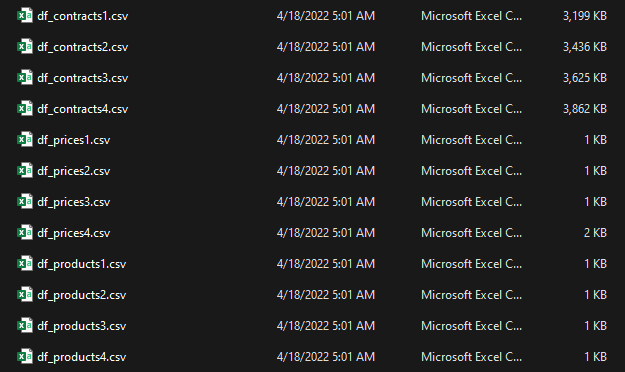

        I have made a temporary database 'tempdb' in SQL server with all the cleaned files to represent a source(data  
        as tables)for extraction. This represents the exports source that are made at 10 pm of first of every month
        ideally using a scheduler, but can also be done by a cron job. Since the question never asked for a solution to
        scheduling and incremental loading. I have kept it as simple as possible and tried to answer the 3 questions.
    

     ELT pipeline - Idea is to extract these files from a SQL server and to load into a PostgreSQL database and transform
     data to find answers in PostgreSQL 
    

In [1225]:
import pyodbc

#username and password, not best to hardcode, can also be passed as environment 
#also please don't copy my password
#variables e.g., pwd = os.environ['PGPASS']
pwd = 'password'
uid = 'lichtblick'
#sql db details
driver ="{ODBC Driver 17 for SQL Server}"
server ="DESKTOP-JLSVSFR"
database ="tempdb;"


#Extract
def extract():
    src_conn = pyodbc.connect(
        'DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-JLSVSFR;DATABASE=tempdb;UID=lichtblick;PWD=password')
    src_cursor = src_conn.cursor()
    try:
        # execute query
        src_cursor.execute(""" select t.name as table_name
        from sys.tables t where t.name in ('df_contracts3','df_products3','df_prices3')""")
        src_tables = src_cursor.fetchall()
        for tbl in src_tables:
            #query and load save data to dataframe
            df = pd.read_sql_query(f'select * FROM {tbl[0]}', src_conn)
            load(df, tbl[0])
    except Exception as e:
        print("Extract Error: " + str(e))
    finally:
        src_conn.close()

#before we create a load function we have to make a database for postgres to save 
#the extracts to.
import psycopg2
import psycopg2.extensions
psycopg2.extensions.register_type(psycopg2.extensions.UNICODE)
psycopg2.extensions.register_type(psycopg2.extensions.UNICODEARRAY)

#Database connection #execute only once as no try-catch block
conn = psycopg2.connect(
database = "postgres", user = "postgres", password = 'password', host= 'localhost', port ='5432')
conn.autocommit = True
#Creating a cursor object
cursor = conn.cursor()
#Query to create a database
sql = '''CREATE database tempdb''';
#Creating database
try:
    cursor.execute(sql)
    print("Database created successfully")
except Exception as e:
    print("Database already created!")
    
#Closing the connection
conn.close()

user= "postgres"
password = "password"
server = "localhost"

#load function that takes 2 arguments
def load(df,tbl):
    try:
        rows_imported = 0
        engine = create_engine(f'postgresql://{user}:{password}@{server}:5432/tempdb')
        print(f'importing rows {rows_imported} to {rows_imported + len(df)}... for table{tbl}')
        #save df to postgres
        df.to_sql(f'stg_{tbl}', engine, if_exists ='replace', index= False)
        rows_imported += len(df)
        #add elapsed time to final print df
        print("Data imported successful")
    except Exception as e:
        print("Data load error:" + str(e))



Database already created!


In [1226]:
try:
    #call extract function
    extract()
except Exception as e:
    print("Error while extracting data:" + str(e))

importing rows 0 to 33700... for tabledf_contracts3
Data imported successful
importing rows 0 to 14... for tabledf_prices3
Data imported successful
importing rows 0 to 6... for tabledf_products3
Data imported successful
